In [43]:
from sklearn.datasets import fetch_mldata

In [44]:
mnist = fetch_mldata('MNIST original')

In [45]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [46]:
X,y = mnist['data'], mnist['target']

In [47]:
X.shape

(70000, 784)

In [48]:
y.shape

(70000,)

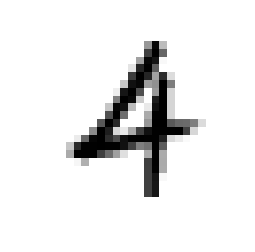

In [49]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[29002]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation='nearest')

plt.axis('off')
plt.show()

In [50]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]

In [51]:
import numpy as np 

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Building the classifier ###

In [52]:
from sklearn.linear_model import SGDClassifier

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

### Using the Classifier to Predict a Certain Type of Digit ###

In [53]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

### Implementing Cross Validation ##

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring ="accuracy")

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([ 0.9649 ,  0.95375,  0.9668 ])

In [55]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3)

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3


### Building a confusion Matrix ###

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[54063,   516],
       [ 1775,  3646]])

A perfect model would have nonzero entries only on the diagonal indices. 

In [57]:
#Precision metric = true positives/(TP+FP); Measures all positives; 
#Recall metric = TP/TP+FN); Also known as sensitivity or true positive rate; 

In [58]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) #classifier categorizes correctly only 77% of the time
recall_score(y_train_5,y_train_pred) #classifier only detects 72% of all the 5s in the dataset; 

0.67256963659841362

#F1 Score: Another way to scale algorithms; takes a blend of precision and recall, allowing you to compare directly to another algorithm. Both must be high for F1 to be high.

In [59]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76093081498486914

#There is a precision/recall tradeoff when designing algorithsm; you can't have both

### The ROC Curve ###

ROC plots true positive rate (recall) agaisnt the false positive rate. The FPR is ratio of negative instances that are incorrectly classfied as positive. It's = 1-TNR. tnr, TRUE NEGATIVE RATE, also known as specificity. Ratio of Negative Instances that are correctly classified as negative. 

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

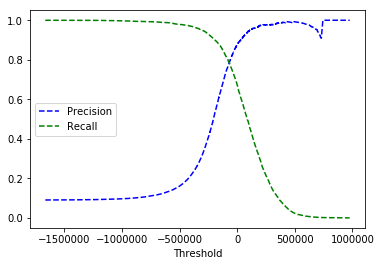

In [64]:

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recall, thresholds):
    
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],'--g',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

If someone asks, we need more precision, ask back, at what recall? There's a tradeoff between the two performance metrics and finding the right balance between the two depends on your application. 

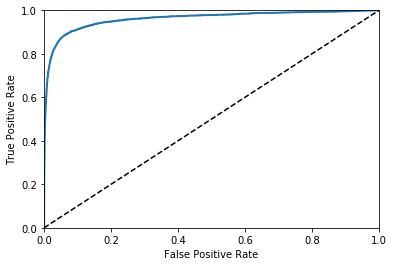

In [66]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()


#Area tells us the effectiveness of a classifier. A perfect one has an area of 1. 

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96130548807975935

#Let's train a randomforest classifier and compare it to the SGD classifier 

In [70]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_clf = cross_val_predict(forest_clf,X_train, y_train_5, cv=3, method='predict_proba')

In [71]:
#To plot a ROC curve, you need scores, not probabilities. A simple solution is to use the positive probabilities as the score 

y_scores_forest = y_probas_clf[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

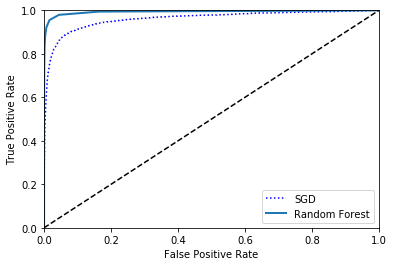

In [72]:
plt.plot(fpr,tpr,"b:",label='SGD')
plot_roc_curve(fpr_forest,tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [73]:
roc_auc_score(y_train_5, y_scores_forest)

0.99348762114324962

Notice that here we're doing binary classification tasks (distinguishing between 2 classes). We're only trying to identify the 5's in the MNIST dataset. Now, we'll try to do multiclass classification

In [74]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 4.])

In [75]:

forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ,  0. ]])

This array tells us with what probability the random forest classifier attempted to classify different digits. It predicted "4" with 90% probability

In [76]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = 'accuracy')

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([ 0.86092781,  0.86159308,  0.86728009])

#The scores above are before any preprocessing on the dataset are taken. Now, we'll standardize input variables and use the same classifier.

In [81]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled, y_train, cv=3, scoring='accuracy')

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([ 0.9095181 ,  0.90889544,  0.91118668])

### Error Analysis ###

Along the machine learning process, you identify the different hyperparameters that return the highest accuracy by using gridsearchCV, etc. The first step is to look at the confusion matrix() function; you need to get scores or preductions, similar to what we did before, to construct the confusion matrix; 


In [84]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/adrianlievano/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([[5723,    2,   29,    9,   12,   47,   47,    8,   42,    4],
       [   1, 6468,   44,   27,    5,   38,   10,    9,  127,   13],
       [  50,   39, 5336,   99,   79,   27,   95,   60,  157,   16],
       [  42,   46,  130, 5349,    2,  243,   39,   54,  130,   96],
       [  15,   28,   39,   10, 5384,   11,   52,   34,   77,  192],
       [  55,   43,   36,  194,   74, 4615,  110,   28,  173,   93],
       [  26,   24,   44,    3,   48,   98, 5621,    4,   49,    1],
       [  20,   20,   70,   27,   58,    9,    8, 5819,   16,  218],
       [  51,  147,   68,  166,   14,  157,   56,   23, 5021,  148],
       [  37,   34,   25,   83,  173,   35,    3,  221,   82, 5256]])

#### Visualize the Confusion Matrix ###

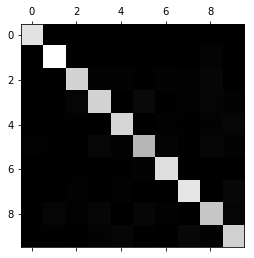

In [85]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

If you look carefully, the number 2,5,8 and 9 are slightly darker than the white boxes, meaning it has more trouble predicting those classes. This could be a result of not having sufficient data or that there are fewer images for 5s than other classes.

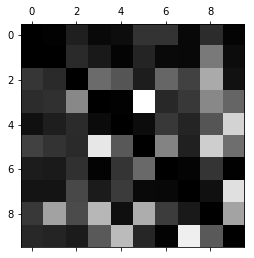

In [88]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

norm_conf_mx = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Chapter 4: Regressions ##


### Polynomial Regressions ###


In [6]:
import numpy as np
m=100 
X= 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X +2 +np.random.randn(m,1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[0]

array([-0.90439976,  0.81793893])

In [11]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([ 2.09413647]), array([[ 0.99010423,  0.50654038]]))

## Decision Boundaries ##

In [14]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X=iris['data'][:,3:]
y= (iris['target']==2).astype(np.int)


In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

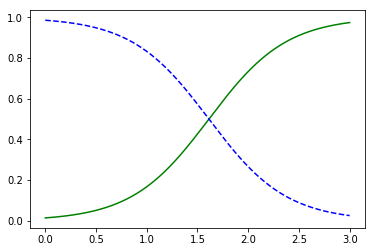

In [18]:
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new) # if we use predict, it'll return the prediction based on binary classification; 
plt.plot(X_new, y_proba[:,1],'g',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris-Virginica')

### Decision Trees ###

In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:]
y=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf, out_file = "iris_tree.dot",
               feature_names = iris.feature_names[2:],
               class_names = iris.target_names,
               rounded = True,
               filled=True)

#decision trees require very little data preparation; they don't require feature scaling or centering at all 

In [25]:
tree_clf.predict_proba([[5,1.5]])


array([[ 0.        ,  0.90740741,  0.09259259]])

In [26]:
tree_clf.predict([[5,1.5]])

array([1])

### Ensemble Learning & Random Forests ###

#Ensemble learning involves taking a group of predictions; random forest involves taking a group of decision tree classifiers and use the prediction of the class that gets the most votes 

Ensemble methods work best when the predictors are as independent from one another as possible. One way to do so is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving aggregate ensemble accuracy

#Ensemble reinforcement learning algorithms

Random Forests are a great way to get a quick understanding of what features actually matter in order to perform feature selection. 

In [33]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm='SAMME.R',learning_rate=0.5)

ada_clf.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=None)

In [34]:
# You can implement early stopping with boosters. Gradient boosters focus on fixing residual errors between predictions


In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val,y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)
bst_n_estimators

30

In [42]:
gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=30, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)